In [1]:
from q_lib import Q_learner
from WoLF_lib import WoLF_PHC
from JAL_AM_lib import JAL_AM
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from tqdm import tqdm

# Average profitability

## Baseline

In [2]:
def run_sim( alpha, gamma, delta_l, delta_w, k, T, n):#(0.3,0.95,0.2,0.6,np.linspace(0,1,7),500000,100)
    """
    args:
        alpha: step-size parameter
        gamma: discount factor
        delta_l:
        delta_w:
        k: length of price action vector
        T: number of total simulations
        n: number of runs simulated
    returns:
        avg_avg_profitabilities: average of average profits over n simulations
    """
    num_calcs=int(T/1000-1) # size of avg. profits 

    #JAL-AM
    summed_avg_profitabilities = np.zeros(num_calcs)
    #t=n
    #for i in range(0, n):
    for i in tqdm(range(n), desc='JAL-AM 1/3', leave=True):
        p_table, avg_profs1, avg_profs2 = JAL_AM(alpha, gamma, T, k)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)

    avg_avg_profitabilities = np.divide(summed_avg_profitabilities, i)
    JAL_AM_res=avg_avg_profitabilities
    avg_avg_profitabilities=0

    #Q-learning
    summed_avg_profitabilities = np.zeros(num_calcs)
    #t=n
    # simulating n runs of Klein_simulation
    for i in tqdm(range(n), desc='Q-learning 2/3', leave=True):
        p_table, avg_profs1, avg_profs2 = Q_learner(alpha, gamma, T, k)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)

    avg_avg_profitabilities = np.divide(summed_avg_profitabilities, i)
    Q_learner_res=avg_avg_profitabilities
    avg_avg_profitabilities=0
    #WoLF-PHC
    summed_avg_profitabilities = np.zeros(num_calcs)
    #t=n
    # simulating n runs of Klein_simulation avg_profs1, avg_profs2, p_table, policy_1, policy_2
    for i in tqdm(range(n), desc='WoLF-PHC 3/3', leave=True):# (0.3, 0.6, 0.2, 0.95, np.linspace(0,1,49), 500000)
        avg_profs1, avg_profs2, p_table, = WoLF_PHC(alpha, delta_l, delta_w, gamma, k, T)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)

    avg_avg_profitabilities = np.divide(summed_avg_profitabilities, i)
    WoLF_PHC_res=avg_avg_profitabilities
    
    return JAL_AM_res,Q_learner_res, WoLF_PHC_res, n, len(k)

In [3]:
JAL_AM_res,Q_learner_res, WoLF_PHC_res, t, k=run_sim(0.3,0.95,0.2,0.6,np.linspace(0,1,7),500000,1000)

WoLF-PHC 3/3: 100%|██████████| 1000/1000 [27:27<00:00,  1.65s/it]


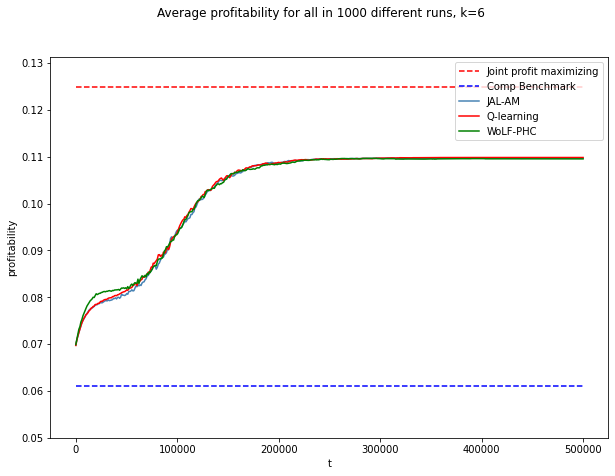

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle("Average profitability for all in {} different runs, k={}".format(t, k-1))
axs.set_xlabel("t")
axs.set_ylabel("profitability")
xs = np.linspace(0, 500000, 499)
axs.set_ylim(0.05,0.125+(0.125*0.05))
axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp Benchmark')#konstant taget fra johanne og morten
axs.plot(xs, JAL_AM_res, color="steelblue", label = "JAL-AM")
axs.plot(xs, Q_learner_res, color="red", label = "Q-learning")
axs.plot(xs, WoLF_PHC_res, color="green", label = "WoLF-PHC")


axs.legend()  # Show the legend to display the label of the newly added line
plt.savefig('first.png')
plt.show()

In [5]:
JAL_AM_res[498]

0.10969981092203472

In [8]:
Q_learner_res[498]

0.10985115671226897

In [7]:
WoLF_PHC_res[498]

0.10955271938605426

## Asymmetric information

# Average profit gain

## Baseline

## Asymmetric information

# Edgeworth cycles

## Baseline

## Asymmetric information